In [1]:
library(pROC)
library(ggplot2)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [2]:
### Train GLM
dtrain <- read.csv("doub_predictors.train.csv")
dtest <- read.csv("doub_predictors.test.csv")

In [5]:
head(dtrain)

bc,doub_score,tot_counts,known_cell_label
AAACCTGAGAAGGCCT,0.4514,1862,singlet
AAACCTGAGAGCTGCA,0.7955,3595,doublet
AAACCTGAGAGTCTGG,0.7653,3375,doublet
AAACCTGAGGATGCGT,0.8034,3476,singlet
AAACCTGAGTTCGCAT,0.4444,1655,singlet
AAACCTGCAAGTAATG,0.4960,2808,singlet


In [6]:
head(dtest)

bc,doub_score,tot_counts
AAACCTGAGACAAGCC,0.4026,1168
AAACCTGAGAGCCCAA,0.3004,2189
AAACCTGAGATGTGTA,0.3004,988
AAACCTGAGCCATCGC,0.5997,1404
AAACCTGAGCTAAGAT,0.5513,1031
AAACCTGAGGAGTCTG,0.8617,3307


In [8]:
### Trained model
mod <- glm(known_cell_label ~ doub_score + log10(tot_counts), data = dtrain, family = "binomial")

In [9]:
x <- data.frame(predict = predict(mod), actual = dtrain$known_cell_label)
roc_obj <- roc(x$actual, x$predict)
auc(roc_obj)

Area under the curve: 0.9152

In [10]:
temp <- data.frame(spec = roc_obj$specificities, thresh = roc_obj$thresholds)

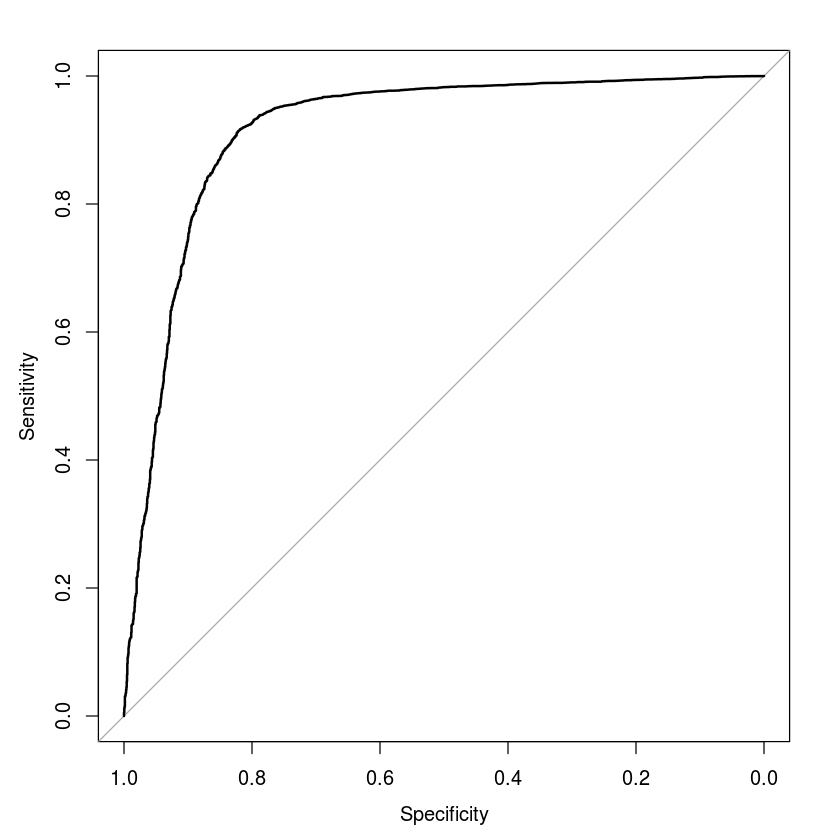

In [11]:
plot(roc_obj)

In [12]:
thresh <- temp[which.min(abs(temp$spec - .82)),]$thresh

In [13]:
thresh

[1] 0.9931021

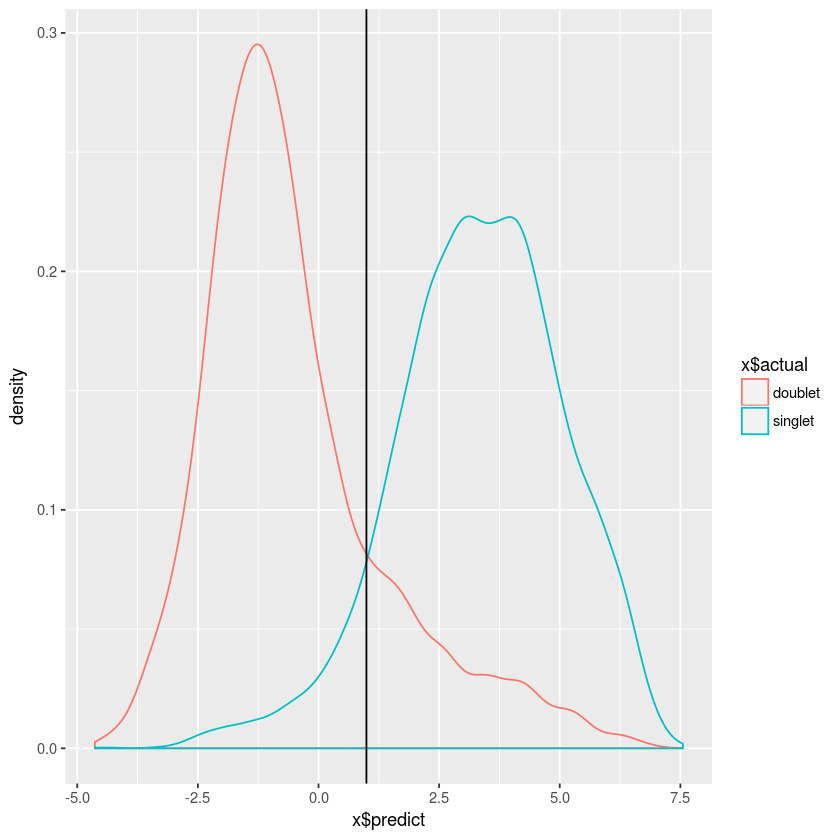

In [14]:
qplot(x$predict, color = x$actual, geom="density") + geom_vline(xintercept = thresh)

In [15]:
new <- data.frame(cell = dtest$bc, predict = predict(mod, newdata = dtest[,c("doub_score" ,"tot_counts")]))

In [18]:
new$call <- sapply(new$predict, function(x) {
    if (x < thresh) return("doublet")
    else return("singlet")
})

In [19]:
write.table(new[,c("cell", "call", "predict")], file="test_data_predictions.txt", quote=FALSE, row.names = FALSE, col.names = FALSE, sep="\t" )

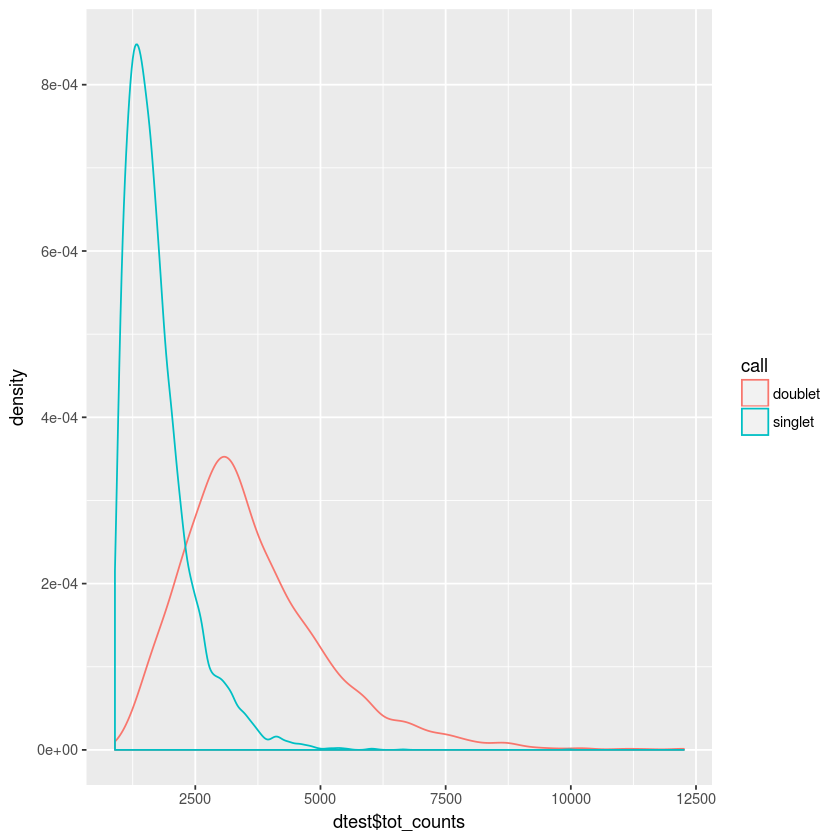

In [20]:
qplot(dtest$tot_counts, color = call, data= new, geom="density")

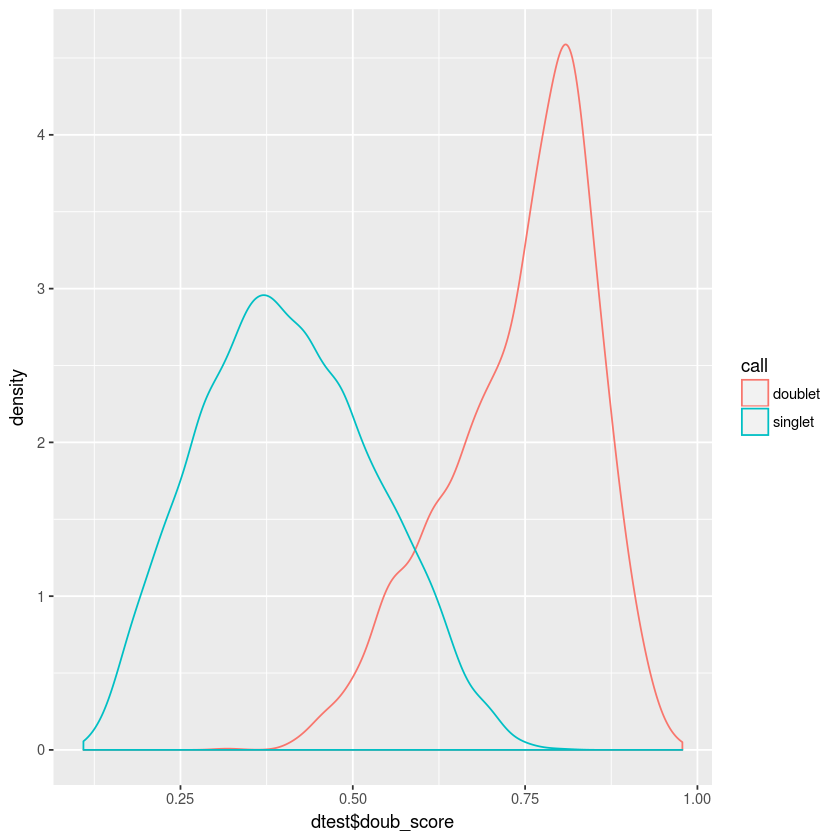

In [21]:
qplot(dtest$doub_score, color = call, data= new, geom="density")

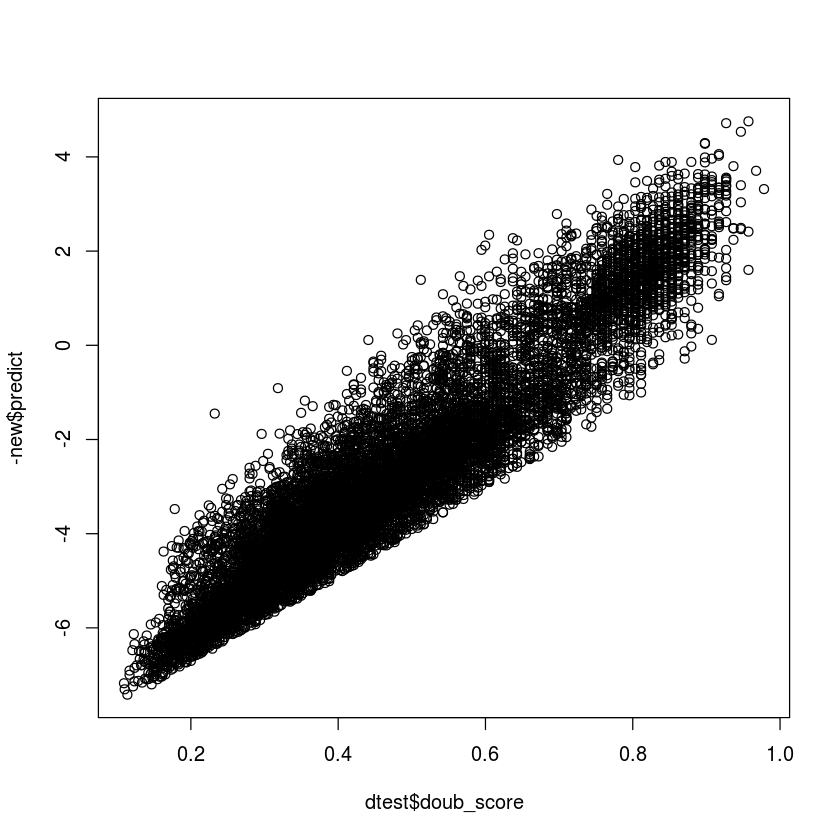

In [23]:
plot(dtest$doub_score, -new$predict)

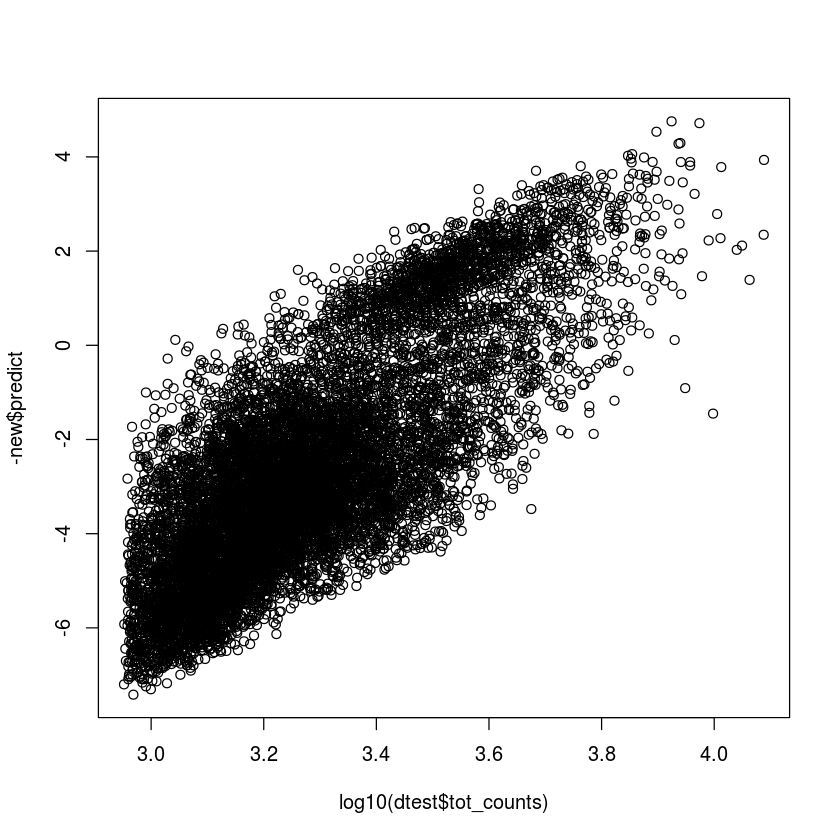

In [25]:
plot(log10(dtest$tot_counts), -new$predict)